In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')

Libraries Import Succesfull


In [2]:
site_browsing=pd.read_csv(r'G:\Siemens\Problem2_Site_BrowingBehavior.csv',delimiter='\t',header=None) 
site_browsing.columns=['Timestamp', 'UserID','Website_section_visited']

In [3]:
site_browsing.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [4]:
site_browsing['Timestamp'].unique()

array(['2017-07-26 00:01:40.965', '2017-07-26 00:03:18.448',
       '2017-07-26 00:36:59.028', ..., '2017-07-26 23:19:11.569',
       '2017-07-26 23:21:56.085', '2017-07-26 23:16:32.835'], dtype=object)

In [5]:
#Converting to datatime format
#site_browsing['Timestamp']=pd.to_datetime(site_browsing['Timestamp'])

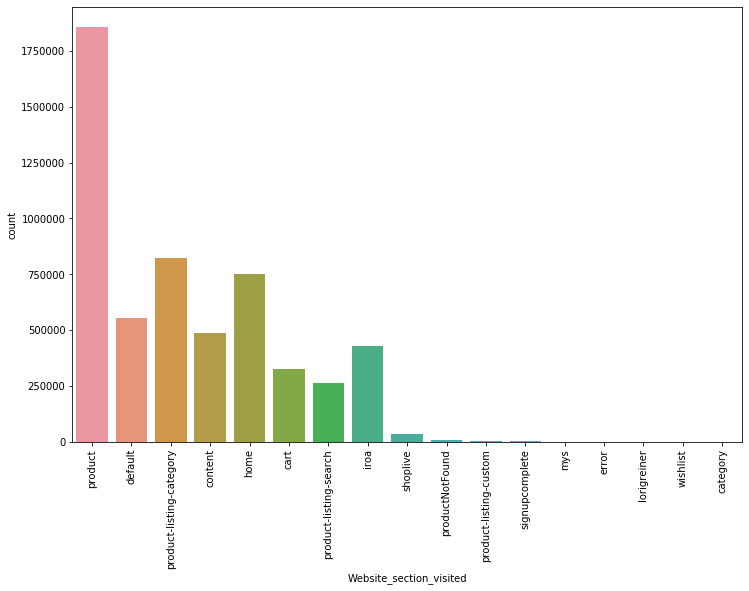

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(site_browsing['Website_section_visited'])
plt.xticks(rotation=90);

In [7]:
print("Shape of Dataset : ",site_browsing.shape)

Shape of Dataset :  (5535924, 3)


In [8]:
site_browsing.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

In [9]:
site_browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
Timestamp                  object
UserID                     int64
Website_section_visited    object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [10]:
#Number of UserIds in dataset
site_browsing['UserID'].nunique()

516932

In [11]:
site_browsing['Website_section_visited'].value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
category                          1
wishlist                          1
Name: Website_section_visited, dtype: int64

In [12]:
site_browsing.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [13]:
#to analyse how many times an account visited
Login_count=site_browsing.groupby('UserID').Website_section_visited.agg(['count']).reindex(
    site_browsing.UserID).reset_index()
Login_count.columns=['UserID','No_of_times_visited']
Login_count.drop_duplicates(inplace=True)
Login_count.head()

,UserID,No_of_times_visited
0,0,1407879
101129,544439661706349,10
101130,634394594974068,19
101134,887103105578626,10
101136,962713767308725,18


#### Reading Final_Conversion Dataset

In [14]:
final_conversion=pd.read_csv(r'G:\Siemens\Problem2_FInalConversions.csv',sep="\t",header = None)
final_conversion.columns=['Timestamp', 'UserID', 'Products_Purchased', 'Cart_Value']
final_conversion.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [15]:
#Converting to datatime format
#final_conversion['Timestamp']=pd.to_datetime(final_conversion['Timestamp'])

In [79]:
#Merging two Dataframes
df_final=pd.merge(final_conversion,site_browsing, on=['UserID'], how='inner', left_index=True, right_index=True)

In [80]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.140,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.500,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.480,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.000,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.740,2017-07-26 00:45:39.197,content


In [81]:
#Seperating last three values from timestamp
df_final['Timestamp_x']=df_final['Timestamp_x'].astype(str)
df_final['Timestamp_y']=df_final['Timestamp_y'].astype(str)

df_final['Timestamp_x']=df_final['Timestamp_x'].str.split('.',expand=True)
df_final['Timestamp_y']=df_final['Timestamp_y'].str.split('.',expand=True)

In [82]:
df_final['Date_time_x']=pd.to_datetime(df_final['Timestamp_x'])
df_final['Date_time_y']=pd.to_datetime(df_final['Timestamp_y'])

In [83]:
#Time Conversion
import datetime
from datetime import timedelta

def Time_conversion(df_final):
    time_delta=df_final['Date_time_y']-df_final['Date_time_x']
    total_seconds=time_delta.total_seconds()
    minutes=total_seconds/60
    return abs(minutes)

In [84]:
df_final['Time_spent_Minutes_day']=df_final.apply(Time_conversion,axis=1)

df_final.drop(['Timestamp_x','Timestamp_y','Date_time_x','Date_time_y'],axis=1,inplace=True)
df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.500
1,0,H209597,31.500,product,3.100
2,0,H211370,30.480,default,36.783
3,0,A282331,51.000,product-listing-category,41.050
4,0,H211410,16.740,content,45.383


In [85]:
#Total Money Spent by Each UserID
df_cart=df_final.groupby('UserID')['Cart_Value'].agg(['sum']).reindex(df_final['UserID']).reset_index()
df_cart.drop_duplicates(inplace=True)
df_cart.columns=['UserID','Total_cart_value']
df_cart.head()

,UserID,Total_cart_value
0,0,1375101.660
548,5942997097932061,157.950
549,23951842225160889,60.960
551,30833658052409950,216.120
552,33873861847792934,53.240


In [86]:
#Total Transactions by Each UserID
df_cart_Products=df_final.groupby('UserID')['Products_Purchased'].agg(['count']).reindex(df_final['UserID']).reset_index()
df_cart_Products.drop_duplicates(inplace=True)
df_cart_Products.columns=['UserID','Total_Products_Purchased']
df_cart_Products.head()

,UserID,Total_Products_Purchased
0,0,20197
548,5942997097932061,1
549,23951842225160889,2
551,30833658052409950,5
552,33873861847792934,1


In [87]:
#Total Time Stamp by Each UserID
df_cart_timestamp=df_final.groupby('UserID')['Time_spent_Minutes_day'].agg(['sum']).reindex(df_final['UserID']).reset_index()
df_cart_timestamp.drop_duplicates(inplace=True)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_cart_timestamp.columns=['UserID','Total_Time_Spent']
df_cart_timestamp.head()

,UserID,Total_Time_Spent
0,0,11780947.583
548,5942997097932061,0.450
549,23951842225160889,52.067
551,30833658052409950,381.183
552,33873861847792934,10.050


In [88]:
df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.500
1,0,H209597,31.500,product,3.100
2,0,H211370,30.480,default,36.783
3,0,A282331,51.000,product-listing-category,41.050
4,0,H211410,16.740,content,45.383


In [89]:
#Merging 4 dataset with
df_final.drop_duplicates(subset='UserID', keep="first",inplace=True)

df_final=pd.merge(df_final,df_cart, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,df_cart_Products, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,df_cart_timestamp, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,Login_count, on=['UserID'], how='inner')

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,A293532,52.140,product,1.500,1375101.660,20197,11780947.583,1407879
1,23951842225160889,H211370,33.480,product-listing-search,26.033,60.960,2,52.067,8
2,30833658052409950,H211394,44.680,content,54.917,216.120,5,381.183,13
3,33873861847792934,H211800,53.240,product,10.050,53.240,1,10.050,5
4,42949238806579040,A286591,30.000,default,14.433,52.480,2,1424.217,20


In [90]:
df_final.drop(['UserID','Products_Purchased','Cart_Value',
               'Website_section_visited','Time_spent_Minutes_day'],axis=1,inplace=True)

In [91]:
df_final.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,1375101.660,20197,11780947.583,1407879
1,60.960,2,52.067,8
2,216.120,5,381.183,13
3,53.240,1,10.050,5
4,52.480,2,1424.217,20


In [92]:
#Buy Probability
df_final['Buy_probability']=(df_final['Total_Products_Purchased']/df_final['No_of_times_visited'])
df_final.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability
0,1375101.660,20197,11780947.583,1407879,0.014
1,60.960,2,52.067,8,0.250
2,216.120,5,381.183,13,0.385
3,53.240,1,10.050,5,0.200
4,52.480,2,1424.217,20,0.100


In [93]:
#User Rank Score
df_final['User_Score_Rank']=(df_final['Buy_probability']*df_final['Total_cart_value'])
df_final.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability,User_Score_Rank
0,1375101.660,20197,11780947.583,1407879,0.014,19726.786
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.183,13,0.385,83.123
3,53.240,1,10.050,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248


In [94]:
#Dropping first row
df_final.drop(df_final.index[0],inplace=True)
df_final.head()

,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability,User_Score_Rank
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.183,13,0.385,83.123
3,53.240,1,10.050,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248
5,111.980,2,80.583,18,0.111,12.442


Text(0.5, 1.0, 'Total Time Spent')

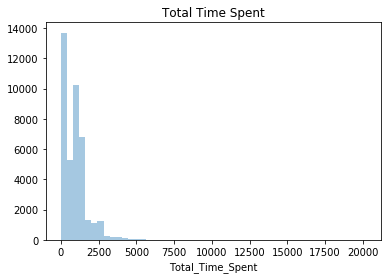

In [159]:
sns.distplot(df_final['Total_Time_Spent'],kde = False,bins=50)
plt.title("Total Time Spent")

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop(['User_Score_Rank'], axis=1) 
y = df_final[['User_Score_Rank']] # Taking Target variable


sc = StandardScaler()
X = sc.fit_transform(X)## Standardizing all Features as they are highly skewed 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32682, 5) (8171, 5)
(32682, 1) (8171, 1)


In [119]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

classifier=XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.22,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
classifier.fit(X_train,y_train)

pred=classifier.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

RMSE :  6.367612851747115
MSE :  40.54649342973503
R2 :  0.9627798016764374


In [138]:
from sklearn.ensemble import RandomForestRegressor
classifier_rf=RandomForestRegressor()
classifier_rf.fit(X_train,y_train)

pred=classifier_rf.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

RMSE :  4.902069102884899
MSE :  24.030281489458755
R2 :  0.9779410802969026


In [139]:
n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), 
            param_distributions = random_grid, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 37.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 50, 60, 80],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [140]:
random_cv2.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [141]:
classifier=RandomForestRegressor(**random_cv2.best_params_)
classifier.fit(X_train,y_train)

pred=classifier.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

RMSE :  5.10814488019535
MSE :  26.093144117065968
R2 :  0.976047447836506


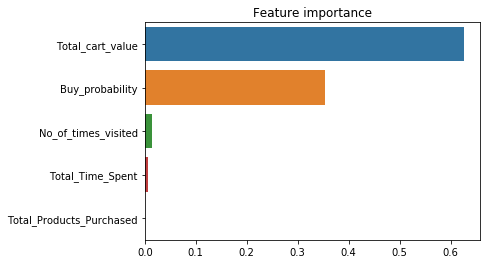

In [145]:
imp = pd.Series(data=classifier.feature_importances_, index=['Total_cart_value', 'Total_Products_Purchased', 
                                                             'Total_Time_Spent','No_of_times_visited', 
                                                             'Buy_probability']).sort_values(ascending=False)
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')